In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/vfv_for_mult_LR.csv")
print(df)

           Open       High        Low      Close  Adj Close
0     24.730000  24.730000  24.690001  24.690001  21.586576
1     24.500000  24.690001  24.490000  24.600000  21.507891
2     24.600000  24.600000  24.570000  24.570000  21.481657
3     24.500000  24.660000  24.500000  24.580000  21.490400
4     24.430000  24.430000  24.410000  24.410000  21.341770
...         ...        ...        ...        ...        ...
1819  78.589996  79.230003  78.550003  79.230003  77.811195
1820  79.519997  79.680000  79.230003  79.279999  77.860298
1821  79.540001  79.639999  79.349998  79.599998  78.174568
1822  79.220001  79.750000  79.169998  79.519997  78.095993
1823  79.540001  79.650002  79.269997  79.620003  78.194214

[1824 rows x 5 columns]


In [ ]:
x = df.drop(["Adj Close"], axis = 1).values
y = df["Adj Close"].values

In [ ]:
print(x)
print("")
print(y)

[[24.72999954 24.72999954 24.69000053 24.69000053]
 [24.5        24.69000053 24.48999977 24.60000038]
 [24.60000038 24.60000038 24.56999969 24.56999969]
 ...
 [79.54000092 79.63999939 79.34999847 79.59999847]
 [79.22000122 79.75       79.16999817 79.51999664]
 [79.54000092 79.65000153 79.26999664 79.62000275]]

[21.58657646 21.5078907  21.48165703 ... 78.17456818 78.09599304
 78.19421387]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.7, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(ml.predict(x_test))

[45.23389213 42.73640374 24.49491109 ... 65.18844709 58.01916219
 53.19278601]


In [ ]:
print(ml.predict([[24.72999954,	24.72999954,	24.69000053,	24.69000053]]))

[20.50278091]


Model Evaluation R2score

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,ml.predict(x_test))

0.9986756022666899

Text(0.5, 1.0, 'Actual v/s Predicted')

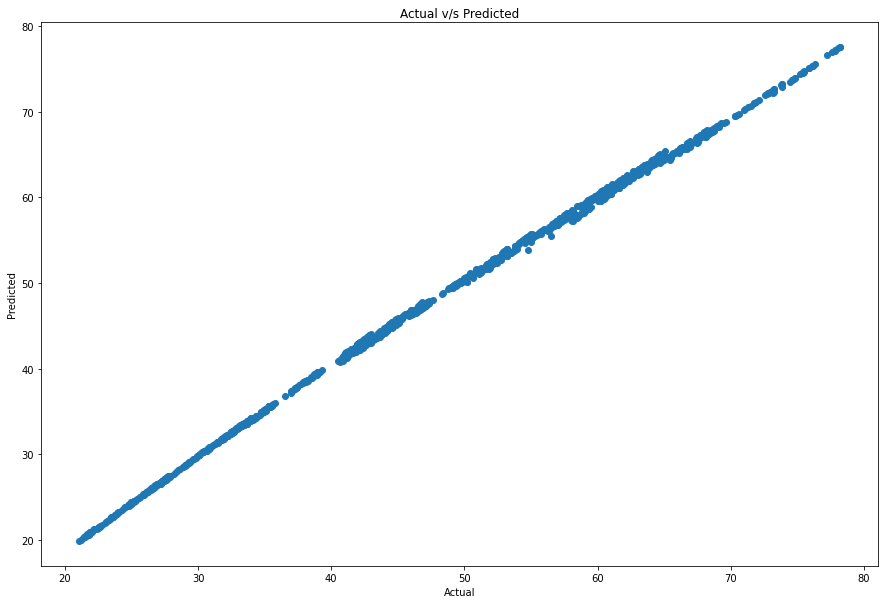

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,ml.predict(x_test))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual v/s Predicted")

In [ ]:
diff = pd.DataFrame({"Actual Value":y_test, "Predicted Value":ml.predict(x_test), "Difference": y_test-ml.predict(x_test)})
diff[0:20]

,Actual Value,Predicted Value,Difference
0,44.927776,45.233892,-0.306116
1,42.080071,42.736404,-0.656333
2,25.190563,24.494911,0.695652
3,32.065914,32.100707,-0.034793
4,69.679878,68.765076,0.914803
5,42.821346,42.953875,-0.132529
6,32.612865,32.562492,0.050374
7,68.574165,67.589685,0.984480
8,34.337612,34.245002,0.092610
9,21.175653,20.007692,1.167961
